## The dataset

This is a real dataset and it was downloaded using web scraping techniques. The data contains registers from fotocasa which is one of the most popular websites of real estate in Spain. Please, do not do this (web scraping) unless it is for academic purposes.

The dataset was downloaded a few years ago by Henry Navarro and In no case were economic returns obtained from it.

It contains thousands of data from real homes published on the web www.fotocasa.com. Your goal is to extract as much information as possible with the knowledge you have so far about data science, for example what is the most expensive home in the entire dataset?

Let's start with precisely that question... Good luck!


#### Read the dataset assets/real_estate.csv and try to visualize the table (★☆☆)


In [6]:
!pip install pandas
!pip install matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 145.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 142.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 179.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.9/930.9 kB 151.8 MB/s eta 0:00:00


In [7]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
df = pd.read_csv ('assets/real_estate.csv', sep=';')
df.head()

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
0,1,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,...,0,0,0,0,0,0,"40,2948276786438","-3,44402412135624",NaN,NaN
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,...,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN
2,3,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,...,0,0,0,0,0,0,"40,4115646786438","-3,90662252135624",NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,...,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN
4,5,153180188,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,106.0,172000,...,0,0,0,0,0,0,"40,2998774864376","-3,45226301356237",NaN,NaN


In [ ]:
df.dtypes

Unnamed: 0            int64
id_realEstates        int64
isNew                  bool
realEstate_name      object
phone_realEstate    float64
url_inmueble         object
rooms               float64
bathrooms           float64
surface             float64
price                 int64
date                 object
description          object
address              object
country              object
level1               object
level2               object
level3               object
level4               object
level5               object
level6               object
level7               object
level8               object
upperLevel           object
countryId             int64
level1Id              int64
level2Id              int64
level3Id              int64
level4Id              int64
level5Id              int64
level6Id              int64
level7Id              int64
level8Id              int64
accuracy              int64
latitude             object
longitude            object
zipCode             

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15335 entries, 0 to 15334
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        15335 non-null  int64  
 1   id_realEstates    15335 non-null  int64  
 2   isNew             15335 non-null  bool   
 3   realEstate_name   15325 non-null  object 
 4   phone_realEstate  14541 non-null  float64
 5   url_inmueble      15335 non-null  object 
 6   rooms             14982 non-null  float64
 7   bathrooms         14990 non-null  float64
 8   surface           14085 non-null  float64
 9   price             15335 non-null  int64  
 10  date              15335 non-null  object 
 11  description       15193 non-null  object 
 12  address           15335 non-null  object 
 13  country           15335 non-null  object 
 14  level1            15335 non-null  object 
 15  level2            15335 non-null  object 
 16  level3            15335 non-null  object

In [ ]:
df['level5'].unique()

array(['Arganda del Rey', 'Fuenlabrada', 'Boadilla del Monte',
       'Las Rozas de Madrid', ' Madrid Capital', 'Villaviciosa de Odón',
       'Pinto', 'Valdemoro', 'Navalcarnero', 'Pozuelo de Alarcón',
       'Torrejón de Ardoz', 'Navalagamella', 'San Sebastián de los Reyes',
       'Rivas-vaciamadrid', 'Alpedrete', 'Móstoles',
       'San Fernando de Henares', 'Coslada', 'Becerril de la Sierra',
       'Alcalá de Henares', 'Chinchón', 'Parla', 'Alcorcón',
       'El Escorial', 'Leganés', 'Pedrezuela', 'Majadahonda',
       'Villanueva de la Cañada', 'Villanueva del Pardillo',
       'Torrelodones', 'Moralzarzal', 'Mejorada del Campo', 'Aranjuez',
       'Corpa', 'Getafe', 'Velilla de San Antonio', 'Sevilla la Nueva',
       'San Martín de la Vega', 'Villalbilla', 'Collado Villalba',
       'Alcobendas', 'El Molar (Madrid)', 'Moraleja de Enmedio', 'Algete',
       'Campo Real', 'Torrejón de la Calzada', 'Colmenar Viejo',
       'Valdemorillo', 'Fuente El Saz de Jarama', 'Tres Cantos',

In [ ]:
len(df['level5'].unique())

168

#### What is the most expensive home in the dataset? (★☆☆)

In [ ]:
df['price'].max()

8500000

#### What is cheapest home in the dataset? (★☆☆)

In [ ]:
df['price'].min()

0

#### What is the biggest and the smallest home in the dataset? (★☆☆)

In [ ]:
min = df['surface'].min()
max = df['surface'].max()
print('La casa mas grande es: ', max)
print ('La casa mas chica es: ', min)

La casa mas grande es:  249000.0
La casa mas chica es:  15.0


#### How many populations (level5) the dataset contains? (★☆☆)

In [ ]:
df['level5Id'].count()

15335

#### Does the dataset contain NAs? (★☆☆)


In [ ]:
df.isnull().sum()

Unnamed: 0              0
id_realEstates          0
isNew                   0
realEstate_name        10
phone_realEstate      794
url_inmueble            0
rooms                 353
bathrooms             345
surface              1250
price                   0
date                    0
description           142
address                 0
country                 0
level1                  0
level2                  0
level3                  0
level4               6643
level5                  0
level6              14627
level7               2277
level8               8579
upperLevel              0
countryId               0
level1Id                0
level2Id                0
level3Id                0
level4Id                0
level5Id                0
level6Id                0
level7Id                0
level8Id                0
accuracy                0
latitude                0
longitude               0
zipCode             15335
customZone          15335
dtype: int64

#### Delete the NAs of the dataset, if applicable (★★☆)

In [9]:
df.dropna()

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone


#### What is the mean of prices in the population (level5) of "Arroyomolinos (Madrid)"? (★★☆)

In [ ]:
df2= df[df['level5'] == 'Arroyomolinos (Madrid)']
promedio= df2['price'].mean()
print('El precio promedio es de {:.2f}'.format(promedio))


El precio promedio es de 294541.60


#### Plot the histogram of prices for the population (level5) of "Arroyomolinos (Madrid)" and explain what you observe (★★☆)

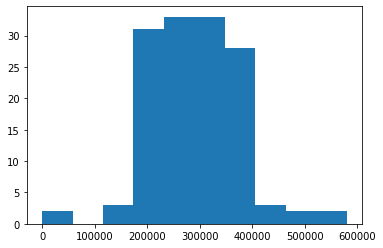


El gráfico sigue una distribución gaussiana al establecer una gran cantidad de propiedades en el rango de precio de 200000 y 400000


In [ ]:
df2= df2[df2['level5'] == 'Arroyomolinos (Madrid)']
plt.hist(df2['price'])
plt.show()
print()
print("El gráfico sigue una distribución gaussiana al establecer una gran cantidad de propiedades en el rango de precio de 200000 y 400000")

#### Now let's work with the "south belt" of madrid. Make a subsetting that contains the following populations (level5): "Fuenlabrada","Leganés","Getafe","Alcorcón" (★★☆) 

In [ ]:
df3 = df['level5'].isin(('Fuenlabrada', 'Leganés', 'Getafe', 'Alcorcón'))
df3

0        False
1         True
2        False
3         True
4        False
         ...  
15330    False
15331    False
15332    False
15333    False
15334    False
Name: level5, Length: 15335, dtype: bool

#### Make a bar plot of the median of prices (★★★) 

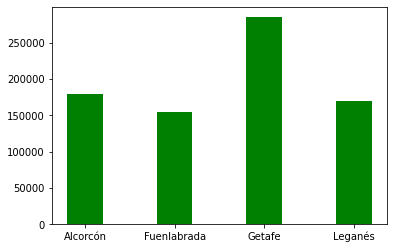

In [ ]:
df3 = df[df['level5'].isin(('Fuenlabrada', 'Leganés', 'Getafe', 'Alcorcón'))]
df3 = df3[['level5', 'price']]
df4 = df3.groupby('level5').median()
lista = df4.index.values.tolist()
valores = df4['price'].tolist()
plt.bar(lista, valores, color='green', width=0.4)
plt.show()

#### Calculate the sample mean and variance of the variables: price, rooms, surface area and bathrooms (★★★) 

In [ ]:
df3 = df[df['level5'].isin(('Fuenlabrada', 'Leganés', 'Getafe', 'Alcorcón'))]
df3 = df3[['level5', 'price', 'rooms', 'surface', 'bathrooms']].sort_values(by='price', ascending=False)

df5 = df3.groupby('level5')
df5 = pd.DataFrame(df5.mean())
from IPython.display import HTML, display_html, display
display(HTML('<h2>Media de las variables</h2>'))
display_html(df5)
print()

#print("Variance of the requested variables")
df6 = df3.groupby('level5')
df6 = pd.DataFrame(df6.var())
from IPython.display import HTML, display_html, display
display(HTML('<h2>Varianza de las variables</h2>'))
display_html(df6)


,price,rooms,surface,bathrooms
level5,,,,
Alcorcón,230071.052632,2.914894,105.913295,1.623656
Fuenlabrada,177198.021459,3.025974,103.624365,1.445415
Getafe,265040.500000,3.151724,126.896266,1.865052
Leganés,208682.010309,2.906736,105.852273,1.518135


,price,rooms,surface,bathrooms
level5,,,,
Alcorcón,1.594783e+10,0.933895,4244.323834,0.592735
Fuenlabrada,4.701021e+09,0.355844,2264.643893,0.353367
Getafe,2.098267e+10,0.772748,5828.110028,0.658809
Leganés,1.191394e+10,0.824590,3987.475195,0.553055


#### What is the most expensive home of each population? (★★☆) 

In [ ]:
df7 = df[df['level5'].isin(('Fuenlabrada', 'Leganés', 'Getafe', 'Alcorcón'))]
df7 = df7[['level5', 'price']].sort_values(by='price', ascending=False)
df7

,level5,price
2881,Getafe,1050000
5585,Alcorcón,950000
12204,Getafe,775000
4900,Getafe,759500
10412,Leganés,650000
...,...,...
4019,Getafe,0
3989,Getafe,0
1003,Getafe,0
3959,Getafe,0


#### Normalize the variable of prices for each population and plot the 4 histograms in the same plot (★★★) 

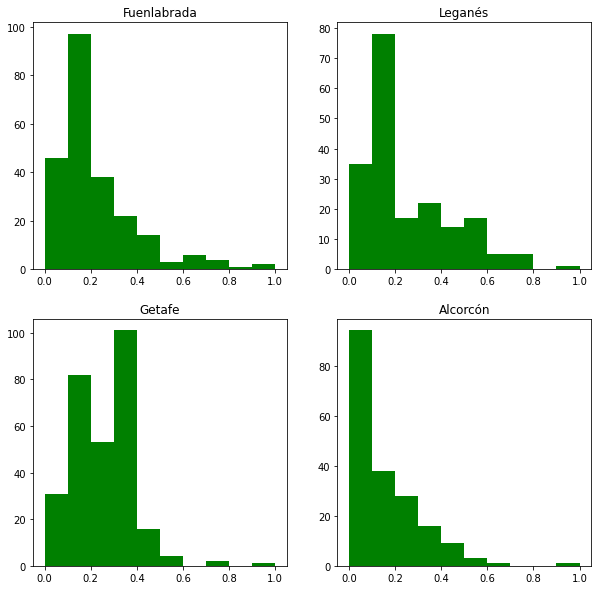

In [ ]:
plt.figure(figsize= (10,10))
id_figura=1

for nombre_poblacion in ['Fuenlabrada', 'Leganés', 'Getafe', 'Alcorcón']:
    
    level5 = df['price'][df['level5'] == nombre_poblacion]
    max= level5.max()
    min= level5.min()
    price_normalize = level5 - min
    price_normalize = price_normalize / (max-min)
    

    plt.subplot(2,2,id_figura)
    plt.hist(price_normalize, color='g')
    id_figura=id_figura+1
    plt.title(nombre_poblacion)

#### Make a plot of the coordinates (lat and long) of the south belt of Madrid by color of each population (★★★★) 
This is a extremely hard exercise and we highly recommend to do it at the end of everything

In [10]:
df3 = df[df['level5'].isin(('Fuenlabrada', 'Leganés', 'Getafe', 'Alcorcón'))]
df3 = df3[['level5', 'longitude', 'latitude']]
df3['longitude'] = pd.to_numeric(df['longitude'],errors = 'coerce')
df3['latitude'] = pd.to_numeric(df['latitude'],errors = 'coerce') # funcion to_numeric es otra forma de convertir los datos


In [ ]:
from ipyleaflet import Marker
from ipyleaflet import Map, basemaps
map = Map(center = (60, -2.2), zoom = 8,
         min_zoom = 1, max_zoom = 20, 
            basemap=basemaps.Stamen.Terrain)

for name, lon, lat in df3[['level5', 'longitude', 'latitude']].values:
    marker = Marker(location=(lat, lon), draggable=False, title=name, alt=name)
    map.add_layer(marker)

map.layout.height="550px"

map

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/jupyter_client/session.py:718: UserWarning: Message serialization failed with:
Out of range float values are not JSON compliant
Supporting this message is deprecated in jupyter-client 7, please make sure your message is JSON-compliant
  content = self.pack(content)


Map(center=[60, -2.2], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

## Another way 

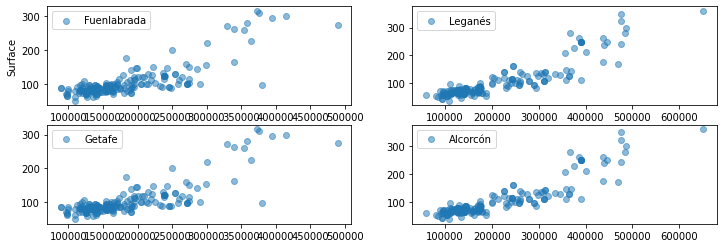

In [40]:

filtered_df = df[['level5', 'price', 'surface']]
populations_to_filter = ('Fuenlabrada', 'Leganés', 'Getafe', 'Alcorcón')
population_df_dict = {population: filtered_df[filtered_df['level5'] == population].dropna() for population in populations_to_filter}

plt.figure(figsize=(12, 4))
plt.subplot(2, 2, 1)
plt.ylabel('Surface')
plt.scatter(population_df_dict[populations_to_filter[0]]['price'], population_df_dict[populations_to_filter[0]]['surface'], alpha=0.5, label=populations_to_filter[0])
plt.legend(loc='upper left')
plt.subplot(2, 2, 2)
plt.scatter(population_df_dict[populations_to_filter[1]]['price'], population_df_dict[populations_to_filter[1]]['surface'], alpha=0.5, label=populations_to_filter[1])
plt.legend(loc='upper left')
plt.xlabel('Price')
plt.subplot(2, 2, 3)
plt.scatter(population_df_dict[populations_to_filter[0]]['price'], population_df_dict[populations_to_filter[0]]['surface'], alpha=0.5, label=populations_to_filter[2])
plt.legend(loc='upper left')
plt.subplot(2, 2, 4)
plt.scatter(population_df_dict[populations_to_filter[1]]['price'], population_df_dict[populations_to_filter[1]]['surface'], alpha=0.5, label=populations_to_filter[3])
plt.legend(loc='upper left')
plt.show()

In [13]:
df3.shape[0]

907

#### What can you say about the price per square meter between the towns of Getafe and Alcorcón?

In [ ]:
filtro_ciudades = df[df['level5'].isin(('Getafe', 'Alcorcón'))]
filtro_ciudades[[ 'price', 'surface']].describe()

,price,surface
count,4.800000e+02,414.000000
mean,2.511984e+05,118.128019
std,1.387275e+05,72.538046
min,0.000000e+00,45.000000
25%,1.358750e+05,70.000000
50%,2.360000e+05,99.500000
75%,3.600000e+05,140.000000
max,1.050000e+06,722.000000


Encontramos un valor inconsistente dado que el mínimo es "min	0.000000e+00	45.000000"
Entre el primer y tercer cuartil, si bien hay una diferencia de la mitad del área pero el precio no sigue la misma linealidad. Tampoco se ve reflejado la linealidad hacia el cuarto cuadril.

#### Reload the data, is the average of "Valdemorillo" and "Galapagar" prices the same?

In [ ]:
prueba3= df[df['level5'] == 'Valdemorillo']
prueba4= df[df['level5'] == 'Galapagar']
prueba3 = pd.DataFrame(prueba3)
prueba4 = pd.DataFrame(prueba4)
prueba5= pd.concat([prueba3, prueba4])
prueba6= prueba5[['level5', 'price']].sort_values(by='price', ascending=False)
prueba6

,level5,price
7545,Valdemorillo,1350000
10138,Galapagar,995000
10108,Galapagar,995000
10902,Galapagar,950000
1198,Galapagar,825000
...,...,...
8447,Galapagar,120000
6889,Galapagar,117800
15059,Valdemorillo,103000
4375,Galapagar,102600


In [ ]:
print("Precio promedio de Valdemorillo es: $ ", prueba6[prueba6['level5'] == 'Valdemorillo'].mean())
print("Precio promedio de Galapagar es: $ ", prueba6[prueba6['level5'] == 'Galapagar'].mean())
print()
print("No tienen el mismo precio")

Precio promedio de Valdemorillo es: $  price    363860.293103
dtype: float64
Precio promedio de Galapagar es: $  price    360063.202381
dtype: float64

No tienen el mismo precio


/tmp/ipykernel_1420/1936755503.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print("Precio promedio de Valdemorillo es: $ ", prueba6[prueba6['level5'] == 'Valdemorillo'].mean())
/tmp/ipykernel_1420/1936755503.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print("Precio promedio de Galapagar es: $ ", prueba6[prueba6['level5'] == 'Galapagar'].mean())


#### What happens if we do the same analysis for price/m2 (★★☆) 

In [ ]:
prueba8= df[df['level5'] == 'Valdemorillo']
prueba9= df[df['level5'] == 'Galapagar']
prueba8 = pd.DataFrame(prueba8)
prueba9 = pd.DataFrame(prueba9)
prueba10= pd.concat([prueba8, prueba9])
prueba10= prueba10[['level5', 'price', 'surface']].sort_values(by='price', ascending=False)
prueba10['precio_m2'] = prueba10['price'] / prueba10['surface']
prueba10.dropna()


,level5,price,surface,precio_m2
7545,Valdemorillo,1350000,500.0,2700.000000
10138,Galapagar,995000,367.0,2711.171662
10108,Galapagar,995000,367.0,2711.171662
10902,Galapagar,950000,412.0,2305.825243
1198,Galapagar,825000,5083.0,162.305725
...,...,...,...,...
8477,Galapagar,120000,43.0,2790.697674
8447,Galapagar,120000,43.0,2790.697674
6889,Galapagar,117800,80.0,1472.500000
15059,Valdemorillo,103000,55.0,1872.727273


In [ ]:
df_p7 =prueba10.loc[:, 'level5'] == 'Valdemorillo'
df_p7 = prueba10.loc[df_p7]
a= df_p7['precio_m2'].mean()
df_p8 =prueba10.loc[:, 'level5'] == 'Galapagar'
df_p8 = prueba10.loc[df_p8]
b= df_p8['precio_m2'].mean()
print("Precio promedio de Valdemorillo es: $ {:.2f}".format(a) )
print("Precio promedio de Galapagar es: $ {:.2f}".format(b) )
if a == b:
    print('Ambos tienen el mismo precio')
else:
    print('No tienen el mismo precio')

Precio promedio de Valdemorillo es: $ 1317.95
Precio promedio de Galapagar es: $ 1606.32
No tienen el mismo precio


#### Could you say there is a relation between surface and price? (★★☆) 
Hint: make a scatter plot.

In [ ]:
prueba3= df[df['level5'] == 'Valdemorillo']
prueba4= df[df['level5'] == 'Galapagar']
prueba3 = pd.DataFrame(prueba3)
prueba4 = pd.DataFrame(prueba4)
prueba5= pd.concat([prueba3, prueba4])
prueba6= prueba5[['level5', 'price', 'surface']].sort_values(by='price', ascending=False)
prueba6


,level5,price,surface
7545,Valdemorillo,1350000,500.0
10138,Galapagar,995000,367.0
10108,Galapagar,995000,367.0
10902,Galapagar,950000,412.0
1198,Galapagar,825000,5083.0
...,...,...,...
8447,Galapagar,120000,43.0
6889,Galapagar,117800,80.0
15059,Valdemorillo,103000,55.0
4375,Galapagar,102600,68.0


In [ ]:
df_p6 =prueba6.loc[:, 'level5'] == 'Valdemorillo'
df_p6 = prueba6.loc[df_p6]
df_p6.head()

,level5,price,surface
7545,Valdemorillo,1350000,500.0
545,Valdemorillo,749000,426.0
6967,Valdemorillo,675000,400.0
6937,Valdemorillo,675000,400.0
14911,Valdemorillo,530000,NaN


In [ ]:
df_p7 =prueba6.loc[:, 'level5'] == 'Galapagar'
df_p7 = prueba6.loc[df_p7]
df_p7.head()

,level5,price,surface
10138,Galapagar,995000,367.0
10108,Galapagar,995000,367.0
10902,Galapagar,950000,412.0
1198,Galapagar,825000,5083.0
576,Galapagar,798500,575.0


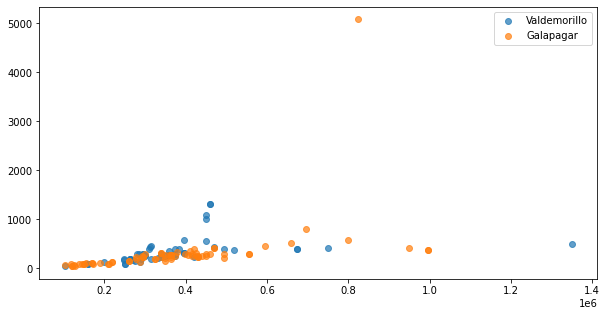

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(df_p6['price'], df_p6['surface'], alpha=0.7, label= 'Valdemorillo')
plt.scatter(df_p7['price'], df_p7['surface'], alpha=0.7, label= 'Galapagar')
plt.legend(loc= 1)
plt.show()


#### Make the same plot for 4 different populations (level5) and rearrange them on the same graph? (★★☆) 
Hint: make a scatter plot of each population using subplots.

In [ ]:
prueba3= df[df['level5'] == 'Los Molinos']
prueba4= df[df['level5'] == 'San Lorenzo de El Escorial']
prueba5= df[df['level5'] == 'Loeches']
prueba6= df[df['level5'] == 'Alcorcón']
prueba7 = pd.DataFrame(prueba3)
prueba8 = pd.DataFrame(prueba4)
prueba9 = pd.DataFrame(prueba5)
prueba10 = pd.DataFrame(prueba6)
prueba11= pd.concat([prueba3, prueba4,prueba5,prueba6])
prueba12= prueba11[['level5', 'price', 'surface']].sort_values(by='price', ascending=False)
prueba12


,level5,price,surface
5585,Alcorcón,950000,722.0
13275,Alcorcón,610000,250.0
1903,Alcorcón,602800,163.0
14832,Los Molinos,590000,613.0
6552,Alcorcón,527800,157.0
...,...,...,...
4813,San Lorenzo de El Escorial,94900,70.0
7349,Alcorcón,91500,79.0
13025,Alcorcón,91500,79.0
10422,San Lorenzo de El Escorial,85000,42.0


In [ ]:
df_p7 =prueba12.loc[:, 'level5'] == 'Los Molinos'
df_p7 = prueba12.loc[df_p7]
df_p8 =prueba12.loc[:, 'level5'] == 'San Lorenzo de El Escorial'
df_p8 = prueba12.loc[df_p8]
df_p9 =prueba12.loc[:, 'level5'] == 'Loeches'
df_p9 = prueba12.loc[df_p9]
df_p10 =prueba12.loc[:, 'level5'] == 'Alcorcón'
df_p10 = prueba12.loc[df_p10]

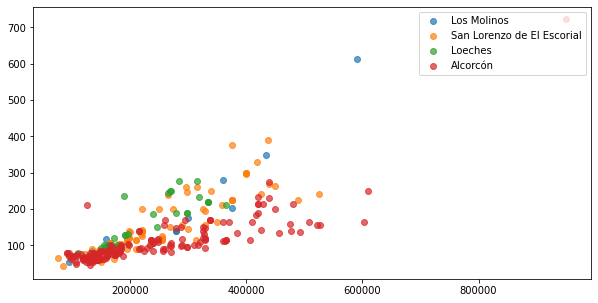

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(df_p7['price'], df_p7['surface'], alpha=0.7, label= 'Los Molinos')
plt.scatter(df_p8['price'], df_p8['surface'], alpha=0.7, label= 'San Lorenzo de El Escorial')
plt.scatter(df_p9['price'], df_p9['surface'], alpha=0.7, label= 'Loeches')
plt.scatter(df_p10['price'], df_p10['surface'], alpha=0.7, label= 'Alcorcón')
plt.legend(loc= 1)
plt.show()

#### How many  real estate agencies the dataset contains? (★★☆) 

In [ ]:
filtro_columna = df.groupby(['id_realEstates'])
filtro_df = filtro_columna['id_realEstates']
print(len(filtro_columna.size()))

14217


#### What is the population (level 5) that contains the most houses? (★★☆) 

In [ ]:
filtro_columna = df.groupby(['level5'])
cantidad_casas = filtro_columna['level5'].count()
print(cantidad_casas.idxmax())

 Madrid Capital
